In [1]:
#import librabries and dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
#load in the data from the csv, naming df as temp since we are concerned with how temperature affects weekly sales
external_factors = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')
external_factors = external_factors.dropna()
del external_factors['store']
external_factors .head(20)

,sale_date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
62,2011-11-11,29.56,3.505,5042.40,2193.04,200.11,3309.98,2743.18,6.232,False,28,468.42
63,2011-11-18,31.73,3.479,2089.46,154.21,3.55,830.60,4425.07,6.232,False,28,279.22
64,2011-11-25,31.39,3.424,90.28,126.47,34754.69,24.64,1560.32,6.232,True,28,349.09
66,2011-12-23,20.79,3.173,485.00,0.18,475.60,16.20,960.85,6.232,False,28,575.78
67,2011-12-30,23.91,3.119,921.67,11778.68,101.87,272.51,1673.25,6.232,True,28,685.46
68,2012-06-01,58.97,3.764,4078.25,22.40,60.41,98.46,968.96,6.169,False,28,585.91
69,2012-01-13,19.55,3.077,1353.58,2551.73,0.24,289.67,1899.49,6.162,False,28,382.02
70,2012-01-20,29.30,3.055,2087.19,1399.47,5.58,75.83,4742.74,6.162,False,28,354.85
75,2012-02-03,25.53,3.031,32702.46,747.82,2.39,8063.07,2940.68,6.162,False,28,318.90
76,2012-03-16,38.02,3.486,3501.15,0.30,1.33,1396.55,1515.46,6.162,False,28,285.96


In [35]:
external_factors.describe()
#wanted to see a breakdown of each column

,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,dept,weekly_sales
count,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000
mean,56.142811,3.625916,8219.364039,4540.034708,2195.387004,3640.162209,4676.753767,7.438743,44.259025,17732.379816
std,17.570431,0.287172,9526.141811,11243.299433,12408.825263,7538.605585,5657.840798,1.707847,30.109156,24698.328688
min,7.460000,3.031000,32.500000,-265.760000,-1.000000,0.460000,170.640000,4.077000,1.000000,-798.000000
25%,42.520000,3.413000,3156.680000,51.730000,4.590000,486.320000,2194.510000,6.403000,19.000000,2744.370000
50%,56.550000,3.622000,5694.250000,236.960000,23.930000,1355.110000,3543.370000,7.348000,37.000000,8575.295000
75%,70.410000,3.840000,9198.080000,3818.850000,120.080000,3301.810000,5659.570000,8.304000,72.000000,22520.290000
max,95.610000,4.301000,88646.760000,104519.540000,141630.610000,67474.850000,105223.110000,12.890000,99.000000,630999.190000


In [39]:
# #find the top stores based weekly sales
# average_sales_week = external_factors.groupby(by=['sale_date'])['weekly_sales'].mean()
# average_sales_week.head()

In [40]:
# #sorting the stores into top 3
# top_stores = external_factors.groupby(by=['store'], as_index=False)['weekly_sales'].mean()
# top_stores.sort_values('weekly_sales', ascending=False)[:3]

In [41]:
# #store 4 is the highest grossing store, using it as a reference for the modeling
# store_4 = external_factors.where(external_factors['store'] == 4)
# store_4 = store_4.dropna()
# store_4.sort_values('weekly_sales', ascending= False)[:3]
# store_4.head(20)
# #store_4.size


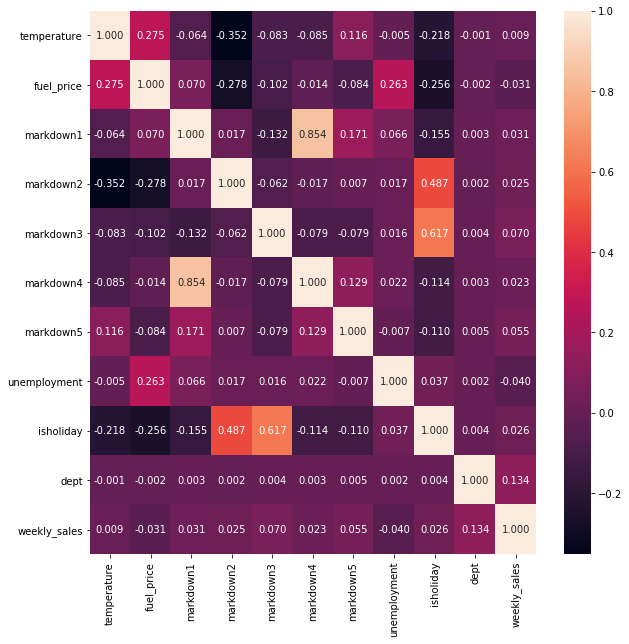

In [42]:
#creating a heat map for the correlation of the variables in regards to weekly sales
import seaborn as sns
corr = external_factors.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('variable_correlation_heatmap.png')
plt.show()




In [43]:
#generating a list of correlation in regards to weekly sales 
corr['weekly_sales'].sort_values(ascending=False)


weekly_sales    1.000000
dept            0.133985
markdown3       0.070418
markdown5       0.054908
markdown1       0.031155
isholiday       0.025789
markdown2       0.025335
markdown4       0.022812
temperature     0.008641
fuel_price     -0.030616
unemployment   -0.040296
Name: weekly_sales, dtype: float64

The values show the correlation score between the row and column at each point. Values will range from 1 (very strong positve correlation, as one goes up, the other tends to, too) to -1 (very strong negative correlation, one goes up will tend to push the other down, or vice-versa), via 0 (no relationship). In our dataset, we can see that the 'MarkDown' and the 'Unemployment' being the most correlated and anti-correlate variables respectively. 

In [44]:
# assigning the data to X and y
X = external_factors[["temperature","isholiday", "dept", "fuel_price", "unemployment", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5"]]
y = external_factors["weekly_sales"].values.reshape(-1,1)
print(X.shape, y.shape)


(149916, 10) (149916, 1)


In [45]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [46]:
# #  Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import mean_squared_error




In [47]:
#traint the model and print out testing and training scores
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
score = model.score(X, y)


print(f"R2 Score: {score}")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")




R2 Score: 0.03311373863262135
Training Score: 0.03347932059158698
Testing Score: 0.03192806638152479


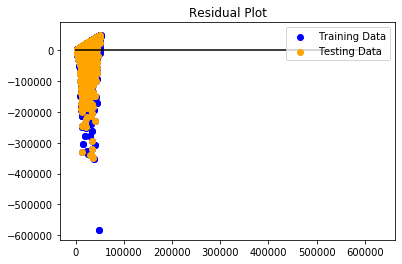

In [48]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig("Residual_Plot.png")
plt.show()

After training and testing our model, we can see the traning, testing and r2 scores are low. One possible explantation for this is the presence of several anti-correlated variables as seen in the heatmap. The presence of temperature, fuel price and unemployment are negatively effecting the model since these variables have almost no relation to weekly sales. From this, we can confidently eliminate these variables from further analysis. 

